In [1]:
# Load Dependancies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind


In [2]:
# Read in the larger, already compiled Full Moon Phase data
moon_data = "../Resources/Moon_Data_Full_Other.csv" 

# Reading in the Moon data (full moon phase vs. Other)
moon_df = pd.read_csv(moon_data)

# Convert the Date column to "datetime"
moon_df['Date'] = pd.to_datetime(moon_df['Date'])

# Drop the Universal time column
moon_df.drop(columns=['Time (Universal Time)'], inplace=True)

# Display the data
moon_df.info()
display(moon_df.tail(1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Moon Phase  537 non-null    object        
 1   Date        537 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 8.5+ KB


,Moon Phase,Date
536,Other,2015-01-13


In [3]:
# Read in the Austin TX Crime data
austin_crime = "../Resources/AustinCrime.csv" 

# Reading in the Austin TX Crime data
austin_crime_df = pd.read_csv(austin_crime)

austin_crime_df.info()
display(austin_crime_df.tail(1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2522585 entries, 0 to 2522584
Data columns (total 19 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Incident Number              int64  
 1   Highest Offense Description  object 
 2   Highest Offense Code         int64  
 3   Family Violence              object 
 4   Occurred Date Time           object 
 5   Occurred Date                object 
 6   Occurred Time                float64
 7   Report Date Time             object 
 8   Report Date                  object 
 9   Report Time                  float64
 10  Location Type                object 
 11  Council District             float64
 12  APD Sector                   object 
 13  APD District                 object 
 14  Clearance Status             object 
 15  Clearance Date               object 
 16  UCR Category                 object 
 17  Category Description         object 
 18  Census Block Group           float64
dtype

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Council District,APD Sector,APD District,Clearance Status,Clearance Date,UCR Category,Category Description,Census Block Group
2522584,20135056615,PROTECTIVE ORDER,3829,N,12/10/2013 10:29,12/10/2013,1029.0,12/10/2013 10:29,12/10/2013,1029.0,RESIDENCE / HOME,NaN,DA,1,N,12/10/2013,NaN,NaN,NaN


In [4]:
# Here too Convert the Austin Crime Date column to "datetime"
austin_crime_df['Occurred Date Time'] = pd.to_datetime(austin_crime_df['Occurred Date Time'])   

# Display the Austin Crime data
austin_crime_df.info()
display(austin_crime_df.tail(1)) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2522585 entries, 0 to 2522584
Data columns (total 19 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   Incident Number              int64         
 1   Highest Offense Description  object        
 2   Highest Offense Code         int64         
 3   Family Violence              object        
 4   Occurred Date Time           datetime64[ns]
 5   Occurred Date                object        
 6   Occurred Time                float64       
 7   Report Date Time             object        
 8   Report Date                  object        
 9   Report Time                  float64       
 10  Location Type                object        
 11  Council District             float64       
 12  APD Sector                   object        
 13  APD District                 object        
 14  Clearance Status             object        
 15  Clearance Date               object        
 16  

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Council District,APD Sector,APD District,Clearance Status,Clearance Date,UCR Category,Category Description,Census Block Group
2522584,20135056615,PROTECTIVE ORDER,3829,N,2013-12-10 10:29:00,12/10/2013,1029.0,12/10/2013 10:29,12/10/2013,1029.0,RESIDENCE / HOME,NaN,DA,1,N,12/10/2013,NaN,NaN,NaN


In [5]:
# Reduce the Austin Crime columns 
austin_crime_df = austin_crime_df[['Occurred Date Time', 'Highest Offense Code', 'Highest Offense Description']]


In [6]:
# Merge the two Datasets (Moon Phases and Austin Crime)
merged_df = pd.merge(austin_crime_df, moon_df, left_on='Occurred Date Time', right_on='Date', how='inner')
# Display the merged data
merged_df.info()
display(merged_df.tail(1))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4268 entries, 0 to 4267
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Occurred Date Time           4268 non-null   datetime64[ns]
 1   Highest Offense Code         4268 non-null   int64         
 2   Highest Offense Description  4268 non-null   object        
 3   Moon Phase                   4268 non-null   object        
 4   Date                         4268 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 166.8+ KB


,Occurred Date Time,Highest Offense Code,Highest Offense Description,Moon Phase,Date
4267,2022-11-01,1709,INDECENCY WITH A CHILD/CONTACT,Other,2022-11-01


In [7]:
# Export to CSV
merged_df.to_csv('merged_austin_moon_df.csv', index=False, header=True)

In [8]:
# Inspect the data
def inspect_data(merged_df):
    # Count moon phases
    moon_phase_counts = merged_df['Moon Phase'].value_counts()
    print(f"moon_phase_counts:\n{moon_phase_counts}\n")
    # Count highest offense codes
    offense_code_counts = merged_df['Highest Offense Code'].value_counts()
    print(f"offense_code_counts:\n{offense_code_counts}\n")
    # Count the number of unique dates]
    unique_dates = merged_df['Date'].nunique()
    print(f"Number of unique dates: {unique_dates}\n")
    # Count the number of unique offense codes
    unique_offense_codes = merged_df['Highest Offense Code'].nunique()
    print(f"Number of unique offense codes: {unique_offense_codes}\n")
    # Count the number of unique moon phases
    unique_moon_phases = merged_df['Moon Phase'].nunique()
    print(f"Number of unique moon phases: {unique_moon_phases}\n")
inspect_data(merged_df)
    


moon_phase_counts:
Moon Phase
Other        3175
Full Moon    1093
Name: count, dtype: int64

offense_code_counts:
Highest Offense Code
601     961
600     468
1400    366
4022    317
2703    225
       ... 
2405      1
2907      1
1712      1
622       1
2700      1
Name: count, Length: 114, dtype: int64

Number of unique dates: 529

Number of unique offense codes: 114

Number of unique moon phases: 2



In [9]:
# Use SCIPY to look for Stistically relevant relationships between Moon data and Crime in Austin
contingency_table = pd.crosstab(merged_df['Moon Phase'], merged_df['Highest Offense Code'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-Square Value: {chi2:.2f}')
print(f'p-Value: {p:.2f}')
print(f'Degrees of Freedom (DOF): {dof}')
# OBSERVATION: 
print(f'OBSERVATION: Significant Relationship: {"Yes" if p < 0.05 else f"None found, as the p-value {p:.2f} is much larger than 0.05 (the typical significance threshold).\n Additionally, the chi-square value of 107.78 with 113 degrees of freedom confirms this, telling us the crime occurances compared to \n Full Moon phases are distributed fairly randomly."}')

Chi-Square Value: 107.78
p-Value: 0.62
Degrees of Freedom (DOF): 113
OBSERVATION: Significant Relationship: None found, as the p-value 0.62 is much larger than 0.05 (the typical significance threshold).
 Additionally, the chi-square value of 107.78 with 113 degrees of freedom confirms this, telling us the crime occurances compared to 
 Full Moon phases are distributed fairly randomly.


In [11]:
# Group Moon Phases and Crime Incidents and compare counts
grouped = merged_df.groupby(['Moon Phase', pd.Grouper(key='Date', freq='D')]).size().reset_index(name='crime_count')

# Calculate Average Crimen by Moon Phase:
ave_crimes_by_phase = grouped.groupby('Moon Phase')['crime_count'].agg(['mean', 'std','count'])
ave_crimes_by_phase = ave_crimes_by_phase.round(2)
print(ave_crimes_by_phase)
# OBSERVATIONS: 
print('The crime rate difference of 0.04 Between Full Moon (8.04) and other phases (8.08) is negligible and helps reinforce the statistical findings \n'
'that more incidents do NOT happen on days with full moons.  The Standard deviation is higher for Full Moon days and this may warrant further investigation \non the increased variance of crimes.')

            mean   std  count
Moon Phase                   
Full Moon   8.04  6.85    136
Other       8.08  5.53    393
The crime rate difference of 0.04 Between Full Moon (8.04) and other phases (8.08) is negligible and helps reinforce the statistical findings 
that more incidents do NOT happen on days with full moons.  The Standard deviation is higher for Full Moon days and this may warrant further investigation 
on the increased variance of crimes.


In [ ]:
# Appy a 't-test' to verify if statistically significant:
full_moon_counts = grouped[grouped['Moon Phase']  == 'Full Moon']['crime_count']
other_phase_counts = grouped[grouped['Moon Phase']  == 'Other']['crime_count']

t_stat, p_val = ttest_ind(full_moon_counts, other_phase_counts, equal_var=False)
print(f't-Statistic: {t_stat:.2f}, \np-value: {p_val:.2f}')
# OBSERVATIONS:
print(f'The t-value {t_stat:.2f} is very close to Zero, therefore there is no significant statistical difference between Full Moon and other Moon Phases.')
print(f'The p-value of {p_val:.2f} is well over the 0.05 threshold, indicates random chance will account for crimes verses Full Moon or Other Phases.')



t-Statistic: -0.06, 
p-value: 0.95
The t-value -0.06 is very close to Zero, therefore there is no significant statistical difference between Full Moon and other Moon Phases
The p-value of 0.95 is well over the 0.05 threshold, indicates random chance will account for crimes verses Full Moon or Other Phases


23:27:59 - cmdstanpy - INFO - Chain [1] start processing
23:27:59 - cmdstanpy - INFO - Chain [1] done processing


<function matplotlib.pyplot.show(close=None, block=None)>

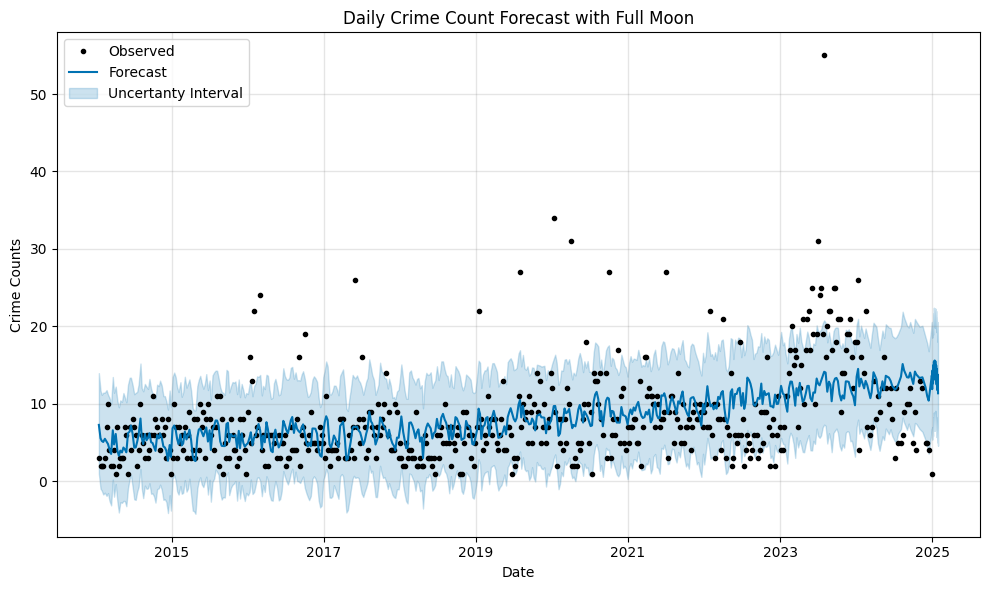

In [12]:
# Use Prophet to look at the data
prophet_df = merged_df.reset_index()
prophet_df = prophet_df.rename(columns={'Date': 'ds'})

# Set Binary values
prophet_df['full_moon'] = (prophet_df['Moon Phase'] =='Full Moon').astype(int)

# Count Daily crimes:
daily_crime = prophet_df.groupby(['ds']).agg(
    crime_count=('Moon Phase', 'count'),
    full_moon=('full_moon', 'max')
).reset_index()

# Create & Fit the Prophet model 
model = Prophet()
model.add_regressor('full_moon')
model_data = daily_crime[['ds', 'crime_count', 'full_moon']]
model_data = model_data.rename(columns={'crime_count': 'y'})
model.fit(model_data)

# Make Predictions with Prophet
future = model.make_future_dataframe(periods=30)
future['full_moon'] = 0

forecast = model.predict(future)
fig = model.plot(forecast)


# Set Title and Lables for Plot output
ax = fig.gca()
ax.set_title('Daily Crime Count Forecast with Full Moon')
ax.set_xlabel('Date')
ax.set_ylabel('Crime Counts')
ax.legend(['Observed', 'Forecast', 'Uncertanty Interval'])

fig.tight_layout()
plt.show

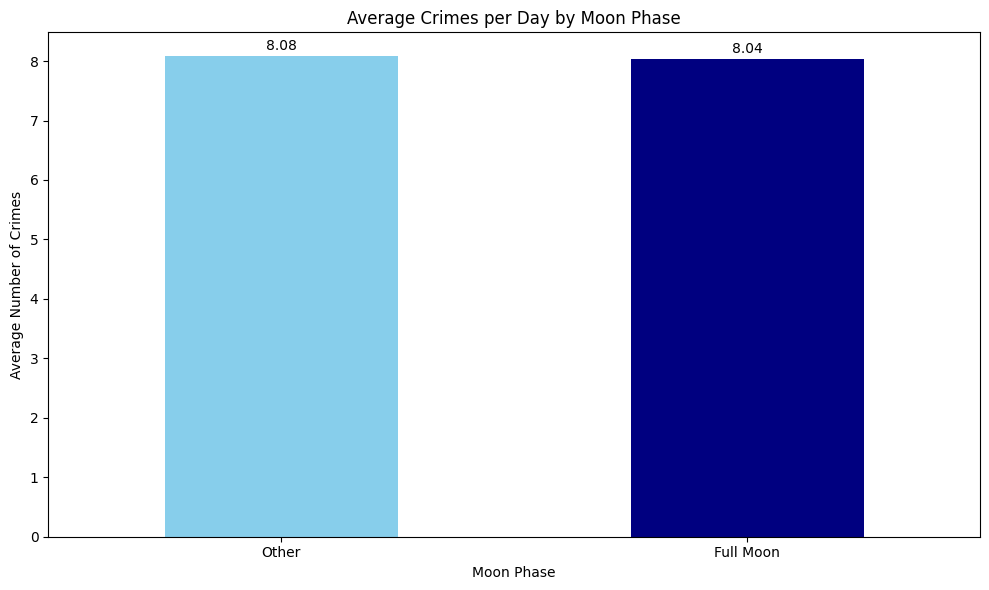

In [14]:
# Count Average number of crimes per day by Moon Phase
moon_days = merged_df.reset_index()[['Date', 'Moon Phase']].drop_duplicates()
days_count = moon_days['Moon Phase'].value_counts()
crime_count = merged_df['Moon Phase'].value_counts()

# Calculate crimes per day
crimes_per_day = crime_count / days_count

# Plot
plt.figure(figsize=(10, 6))
ax = crimes_per_day.plot(kind='bar', color=['skyblue', 'navy'], legend=False)
plt.title('Average Crimes per Day by Moon Phase')
plt.ylabel('Average Number of Crimes')
plt.xlabel('Moon Phase')
plt.xticks(rotation=0)

# Place values on top of bars
for i, v in enumerate(crimes_per_day):
    ax.text(i, v + 0.1, f'{v:.2f}', ha='center')

plt.tight_layout()
plt.show()

In [15]:
# First convert 'Occurred Date Time' to "datetime" & set as index
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df.set_index('Date', inplace=True)

# Plot the Highest number of Offenses correlated to Full Moon Phase phases
    

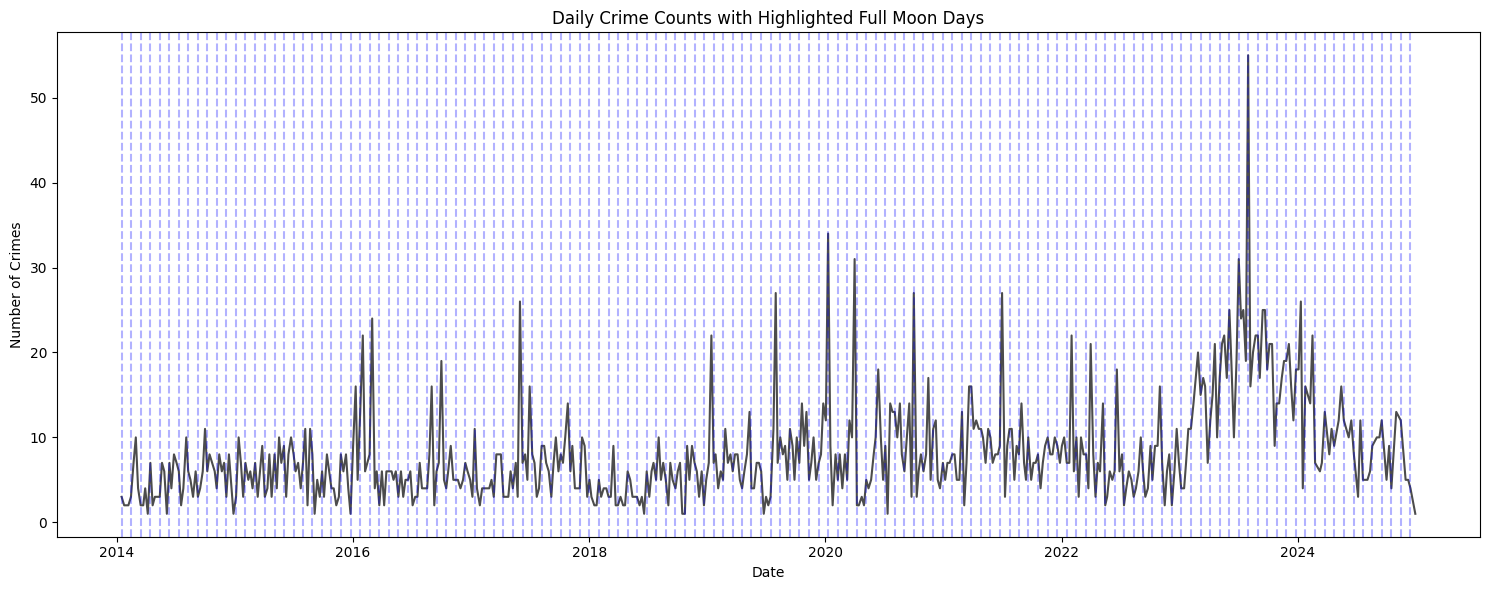

In [16]:
# Bring back in Time Series Plot and improve upon it:
# Plot the Highest number of Offenses correlated to Full Moon Phase phases
daily_crime_counts = merged_df.reset_index().groupby('Date').size().reset_index(name='crime_count')


# Get all Full Moon Dates:
full_moon_dates = merged_df[merged_df['Moon Phase'] == 'Full Moon'].reset_index()['Date'].unique()
# full_moon_crimes = daily_crime_counts[daily_crime_counts.index.isin(full_moon_dates)]
# other_days_crimes = daily_crime_counts[~daily_crime_counts.index.isin(full_moon_dates)]
# full_moon_average = full_moon_crimes.mean()
# other_days_average = other_days_crimes.mean()

# Plot the data
plt.figure(figsize=(15, 6))
plt.plot(daily_crime_counts['Date'], daily_crime_counts['crime_count'], color='black', alpha=0.7)

# Highlight Full Moon Dates:
for date in full_moon_dates:
    plt.axvline(x=date, color='blue', alpha=0.3, linestyle='--')

plt.title("Daily Crime Counts with Highlighted Full Moon Days")
plt.xlabel("Date")
plt.ylabel("Number of Crimes")
plt.tight_layout()
plt.show()

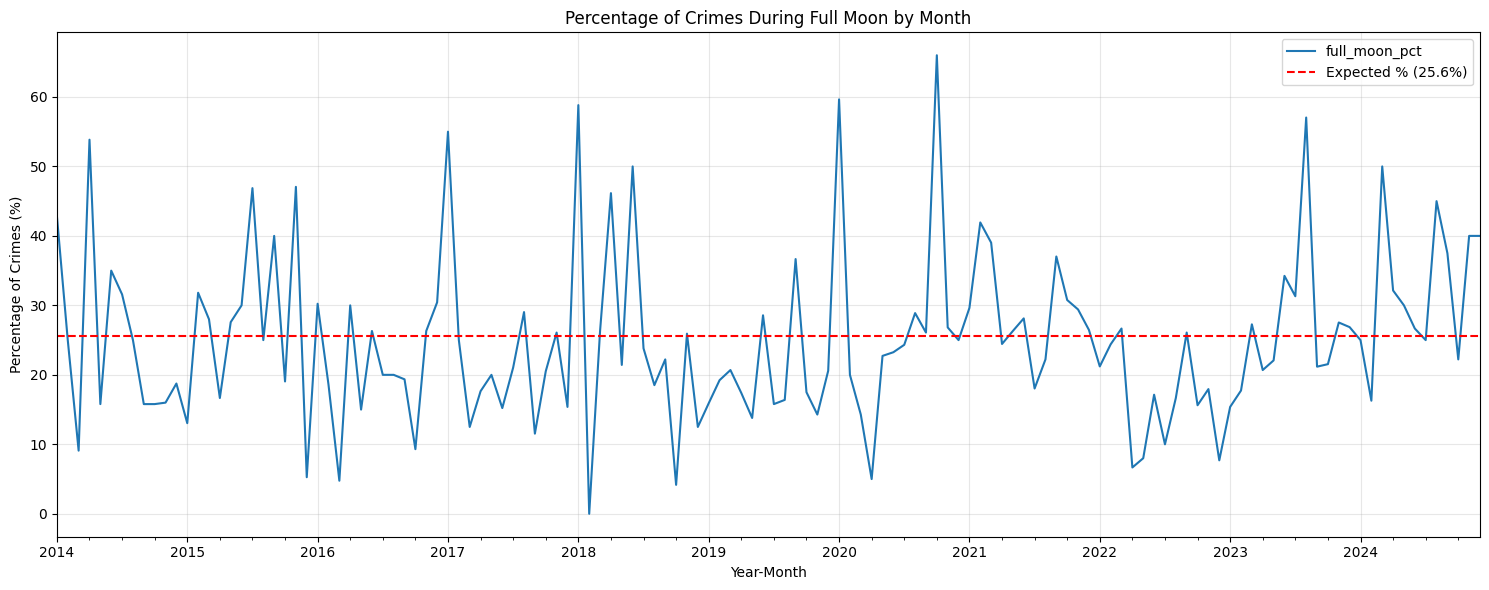

In [ ]:
# Quick Test 2:
# Add year-month column
merged_df['year_month'] = merged_df.index.to_period('M')

# Group by year-month and moon phase
monthly_by_phase = merged_df.groupby([merged_df.index.to_period('M'), 'Moon Phase']).size().unstack(fill_value=0)

# Calculate number of days with Full vs. Other Moon Phases
full_moon_days = merged_df['Moon Phase'].value_counts().get('Full Moon', 0)
other_moon_days = merged_df['Moon Phase'].value_counts().sum() - full_moon_days

# Calculate the percentage of crimes during full moon for each month
if 'Full Moon' in monthly_by_phase.columns:
    monthly_by_phase['full_moon_pct'] = monthly_by_phase['Full Moon'] / monthly_by_phase.sum(axis=1) * 100


# Plot the percentage over time
plt.figure(figsize=(15, 6))
monthly_by_phase['full_moon_pct'].plot()
plt.axhline(y=full_moon_days/(full_moon_days+other_moon_days)*100, color='r', linestyle='--', 
            label=f'Expected % ({full_moon_days/(full_moon_days+other_moon_days)*100:.1f}%)')
plt.title('Percentage of Crimes During Full Moon by Month')
plt.ylabel('Percentage of Crimes (%)')
plt.xlabel('Year-Month')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()